## **Problem Statement**

Improve the presence, profit and business processes of Company X's clothing business in the USA.

### **Data Cleaning**

In [1]:
# import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
data = pd.read_csv('/content/drive/My Drive/customer_trend.csv')

Mounted at /content/drive


In [3]:
# view data
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# checking for any duplicates
data.duplicated().sum()

0

In [5]:
# checking for any null values
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [6]:
# find if 'Promo Code Used' and 'Discount Applied' are identical
data['Discount Applied'].equals(data['Promo Code Used'])

True

In [7]:
# removing unnecessary columns (customer ID and Promo Code Used)
data = data.drop(columns=['Customer ID', 'Promo Code Used'])

In [8]:
# turn Gender,Subscription Status and Discount Applied into numerical variables
data['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

data['Subscription Status'].replace(['No', 'Yes'], [0, 1], inplace=True)

data['Discount Applied'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [9]:
data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,55,0,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,1,14,Venmo,Fortnightly
1,19,0,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,1,2,Cash,Fortnightly
2,50,0,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,1,23,Credit Card,Weekly
3,21,0,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,1,49,PayPal,Weekly
4,45,0,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,1,31,PayPal,Annually


### **Finding the most crucial factor affecting the ratings of the company**

##### Overview


i. Overall rating of the business

In [10]:
# finding the overall rating of the business
rating_sum = data['Review Rating'].sum()
total_obs = data.shape[0]
result = rating_sum / total_obs
result = round(result, 3)

print('The Girlies has an average rating of', result)

The Girlies has an average rating of 3.75


ii. Proportion of orders

In [13]:
# creating the bins
bins = [0, 1, 2, 3, 4, 5]

# creating a new column for the rating group
data['Rating Group'] = pd.cut(data['Review Rating'], bins=bins, labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

# new dataframe to count the unique values of the rating group
df1 = data['Rating Group'].value_counts().reset_index(name='Count')
df1

,index,Count
0,3-4,1590
1,4-5,1463
2,2-3,847
3,0-1,0
4,1-2,0


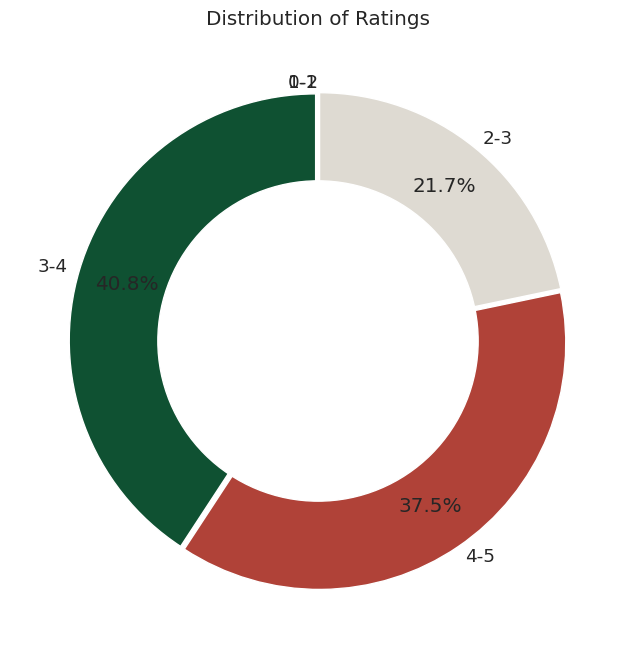

In [14]:
# forming a piechart
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

def custom_autopct(pct):
    return f'{pct:.1f}%' if pct != 0 else ''  # only return percentage if count >0

plt.pie(
    x=df1['Count'], labels=df1['index'],
    colors=["#0F5132", "#b04238", "#dedad2", "#e4bcad", "#df979e"],
    startangle=90,labeldistance=1.05,
    # show percentages
    autopct=custom_autopct,
    # move the percentage inside the arcs
    pctdistance=0.80,
    # add space between the arcs
    explode= [0.01, 0.01, 0.01, 0.0, 0.0]
)

### adding a hole in the pie
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Distribution of Ratings')
plt.show()

iii. multicollinearity

<ipython-input-15-13a36ee9e0a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corrwith(data['Review Rating'])


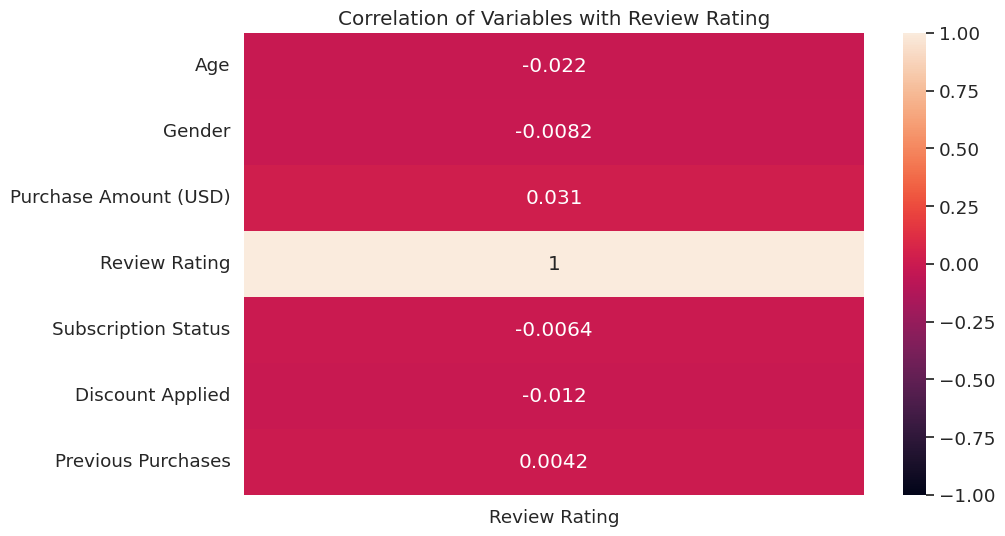

In [15]:
# finding correlation of numerical variables against review rating
correlation_matrix = data.corrwith(data['Review Rating'])
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix.to_frame(),annot = True, vmin=-1, vmax=1)
plt.title(f'Correlation of Variables with Review Rating')
heatmap.set_xticklabels([f'Review Rating'], rotation=0)
plt.show()

All numerical features have weak correlation to 'Review Rating', suggesting that the relationship between each variable to 'Review Rating' is not strong.

##### Is Product Quality an issue?

###### Item purchased (grouped by Category) x Review Rating

Purpose: To find the best and worst performing Category and Item Purchased

In [15]:
# finding average of review rating across items: ratings vary between 3.6-3.9 across items
grpdf1 = data.groupby(['Category', 'Item Purchased'])['Review Rating'].mean().reset_index()
grpdf1.head()

,Category,Item Purchased,Review Rating
0,Accessories,Backpack,3.752448
1,Accessories,Belt,3.761491
2,Accessories,Gloves,3.864286
3,Accessories,Handbag,3.775163
4,Accessories,Hat,3.806494


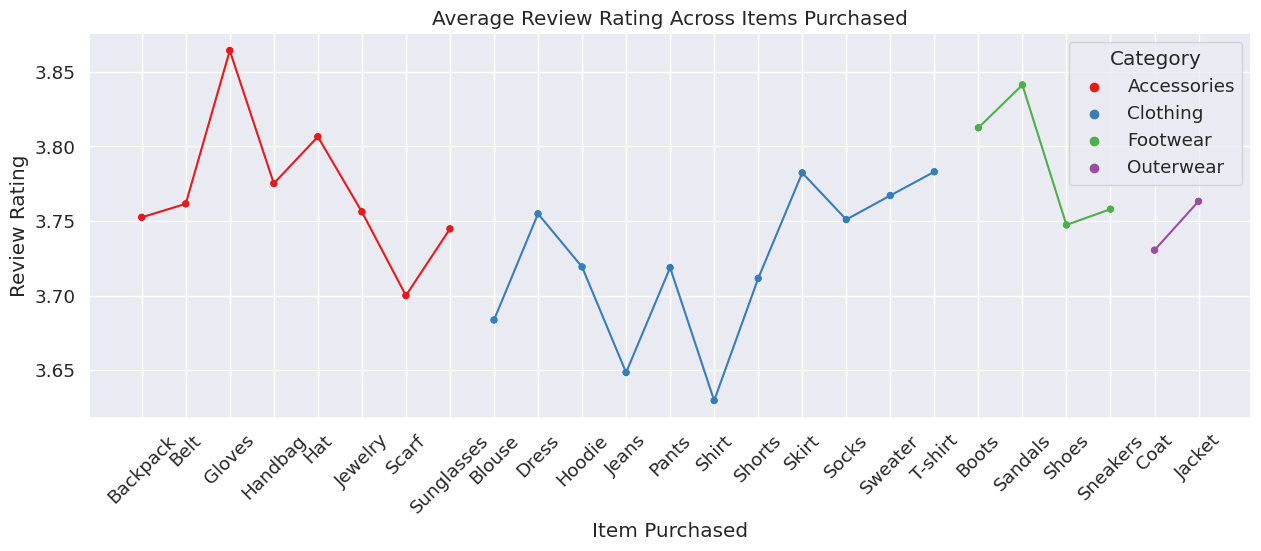

In [16]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Item Purchased', y='Review Rating', hue='Category', data= grpdf1, palette='Set1', legend='brief')
sns.lineplot(x='Item Purchased', y='Review Rating', hue='Category', data= grpdf1, palette='Set1', style='Category', markers=False, dashes=False, legend=False)
plt.xticks(rotation=45)
plt.title('Average Review Rating Across Items Purchased')
plt.show()

###### Location x Review Rating

Purpose: To understand the diversity of ratings across states. Are there any outliers?

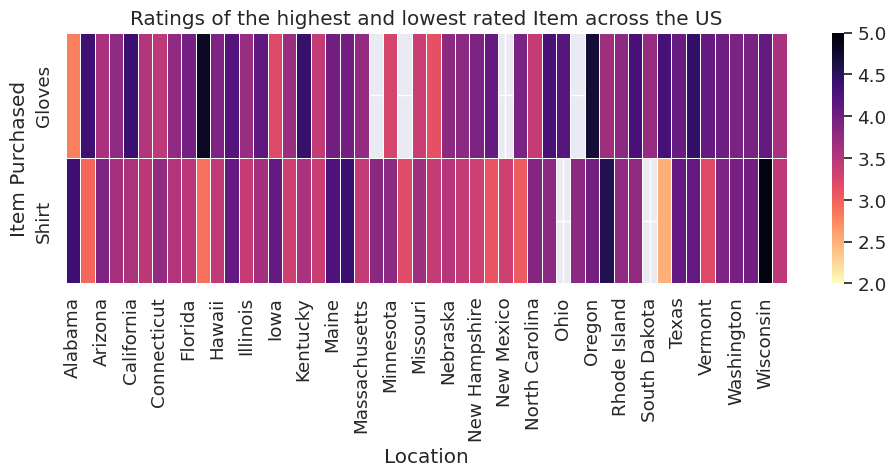

In [17]:
# taking the highest and lowest rated item
# group by Purchased Item = Gloves and Shirt
newdata = data[(data['Item Purchased'] == 'Gloves') | (data['Item Purchased'] == 'Shirt')]
nd_pivot = newdata.pivot_table(values='Review Rating', index='Item Purchased', columns='Location')

plt.figure(figsize=(10, 5))
sns.set(font_scale=1.2)
sns.heatmap(nd_pivot, cmap='magma_r', annot=False, fmt=".2f", linewidths=.5, vmin=2, vmax=5)
plt.title('Ratings of the highest and lowest rated Item across the US')
plt.tight_layout()
plt.show()

###### Color x Review Rating

Text(0.5, 1.0, 'Review Rating across Seasons')

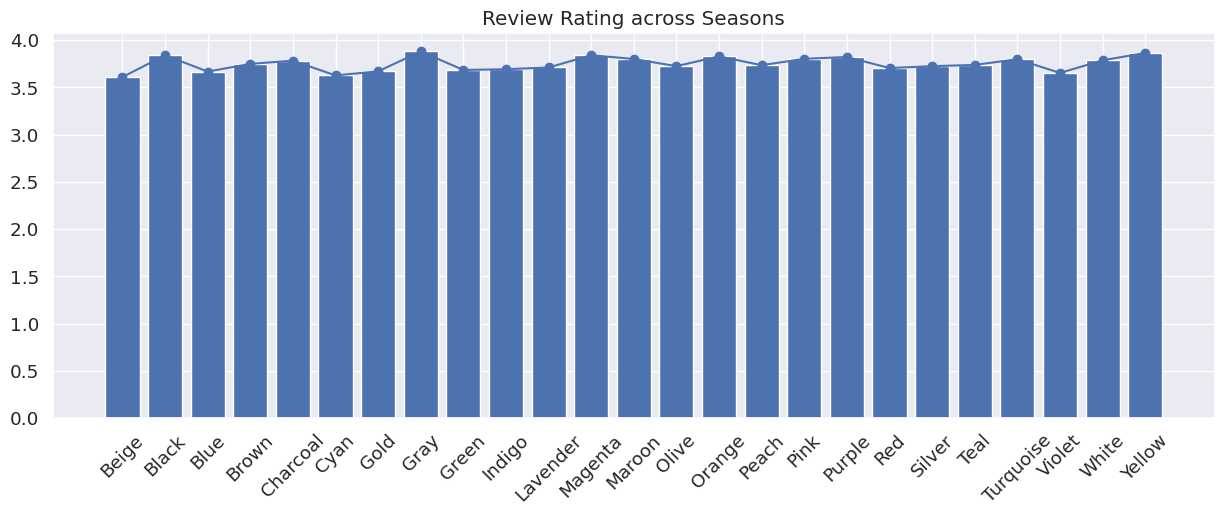

In [24]:
d = data.groupby('Color')['Review Rating'].mean().reset_index()
plt.figure(figsize=(15, 5))
plt.plot(d['Color'], d['Review Rating'], marker='o', linestyle='-', color='b', label='Line Plot')
plt.xticks(rotation=45)
plt.title('Review Rating across Color of Purchased Item')

plt.bar(d['Color'], d['Review Rating'])
plt.xticks(rotation=45)
plt.title('Review Rating across Seasons')

###### Season x Review Rating

Text(0.5, 1.0, 'Review Rating across Seasons')

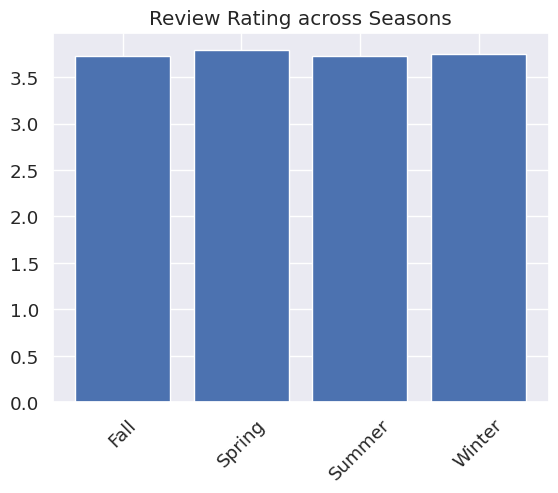

In [23]:
e = data.groupby('Season')['Review Rating'].mean().reset_index()

plt.bar(e['Season'], e['Review Rating'])
plt.xticks(rotation=45)
plt.title('Review Rating across Seasons')

##### Is Customer Profile an issue?

###### Age x Review Rating
Find the spread of ratings across age groups


In [18]:
bins = [10, 20, 30, 40, 50, 60, 70]
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=['10-20', '21-30', '31-40', '41-50', '51-60', '61-70'])

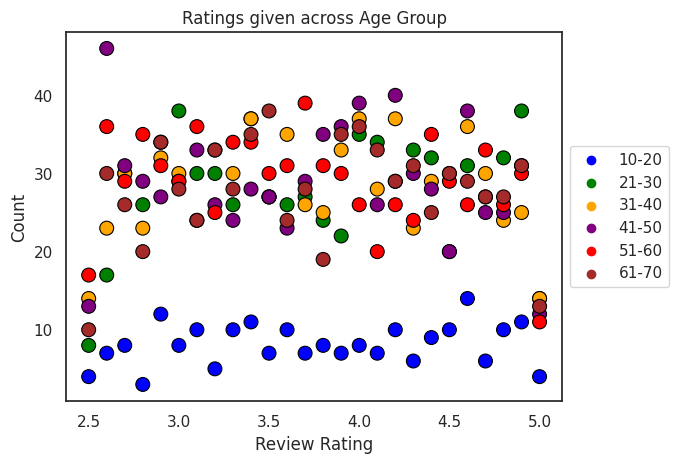

In [19]:
grpdf4 = data.groupby('Age Group')['Review Rating'].value_counts().reset_index(name='Count')

sns.set(style='white')
colors = ['blue', 'green', 'orange', 'purple', 'red', 'brown']

sns.scatterplot(x='Review Rating', y='Count', hue='Age Group', data=grpdf4, palette=colors, s=100, edgecolor='black')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.title('Ratings given across Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

###### Frequency of Purchases x Review Rating

Text(0.5, 1.0, 'Review Rating across Frequency of Purchases')

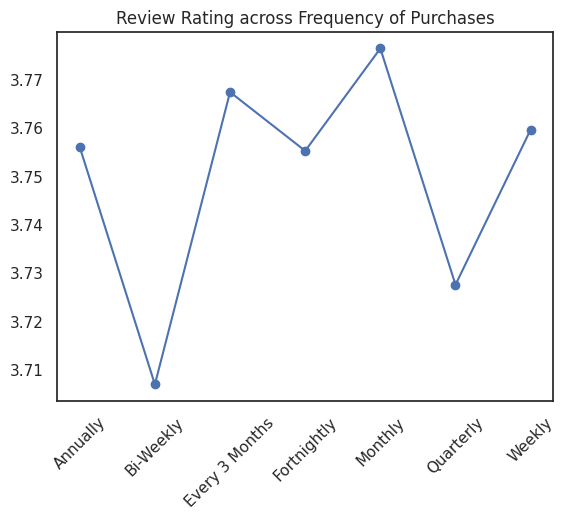

In [22]:
c = data.groupby('Frequency of Purchases')['Review Rating'].mean().reset_index()
plt.plot(c['Frequency of Purchases'], c['Review Rating'], marker='o', linestyle='-', color='b', label='Line Plot')
plt.xticks(rotation=45)
plt.title('Review Rating across Frequency of Purchases')

##### Is Transaction Preference an issue?

###### Payment Method x Review Rating
How ratings vary across payment method


Text(0.5, 1.0, 'Review Rating across Payment Method')

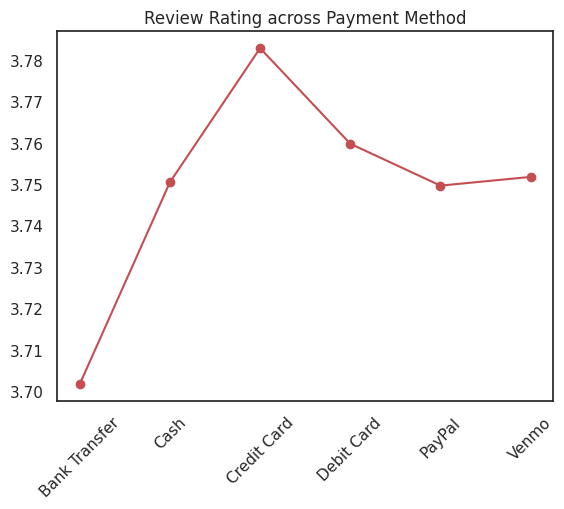

In [20]:
b = data.groupby('Payment Method')['Review Rating'].mean().reset_index()
plt.plot(b['Payment Method'], b['Review Rating'], marker='o', linestyle='-', color='r', label='Line Plot')
plt.xticks(rotation=45)
plt.title('Review Rating across Payment Method')

###### Shipping Type x Review Rating

Text(0.5, 1.0, 'Review Rating across Shipping Type')

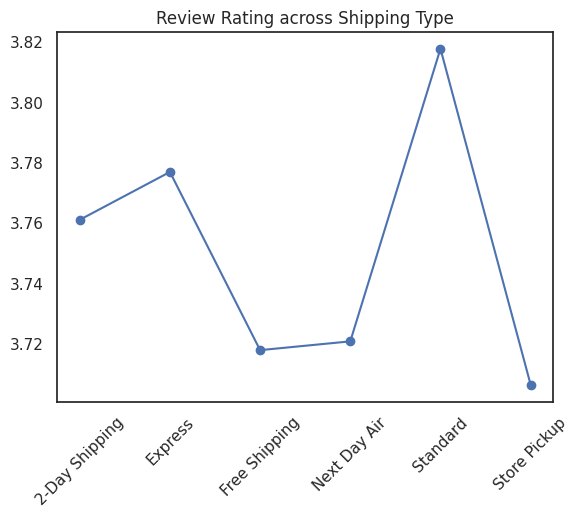

In [21]:
f = data.groupby('Shipping Type')['Review Rating'].mean().reset_index()
plt.plot(f['Shipping Type'], f['Review Rating'], marker='o', linestyle='-', color='b', label='Line Plot')
plt.xticks(rotation=45)
plt.title('Review Rating across Shipping Type')

### *previous codes*

In [25]:
# turn Gender, Category, Season, Subscription Status, Discount Applied into numerical variables

data['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

data['Category'].replace(['Clothing', 'Accessories', 'Footwear', 'Outerwear'], [0, 1, 2, 3], inplace=True)

data['Season'].replace(['Spring', 'Fall', 'Winter', 'Summer'], [0, 1, 2, 3], inplace=True)

data['Shipping Type'].replace(['Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'], [0, 1, 2, 3, 4, 5], inplace=True)

data['Subscription Status'].replace(['No', 'Yes'], [0, 1], inplace=True)

data['Discount Applied'].replace(['No', 'Yes'], [0, 1], inplace=True)

##### (b) Which category has the highest and lowest reviews?

In [26]:
# finding average of review rating across category: all categories have about the same average rating of 3.7-3.8
# highest is footwear and lowest is clothing
data.groupby('Category')['Review Rating'].mean()

Category
0    3.723143
1    3.768629
2    3.790651
3    3.746914
Name: Review Rating, dtype: float64

In [27]:
# finding sum of review rating across category: Clothing is the highest, and Outerwear is the lowest
data.groupby('Category')['Review Rating'].sum().to_dict()

{0: 6467.1, 1: 4673.1, 2: 2270.6, 3: 1214.0}

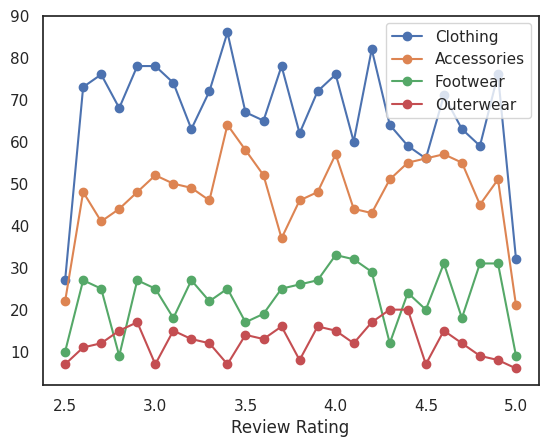

In [28]:
# visualizing how ratings vary across categories
grpdf = data.groupby('Review Rating')['Category'].value_counts()
grpdf = grpdf.reset_index(name='Count')

fig, ax = plt.subplots()
grpdf.groupby('Category').plot(x="Review Rating", y="Count", marker="o", ax=ax)
ax.legend(['Clothing', 'Accessories', 'Footwear', 'Outerwear'])

#clothing is highly rated (a lot of people rated).

##### (d) In which state do the highest/lowest reviews come from?

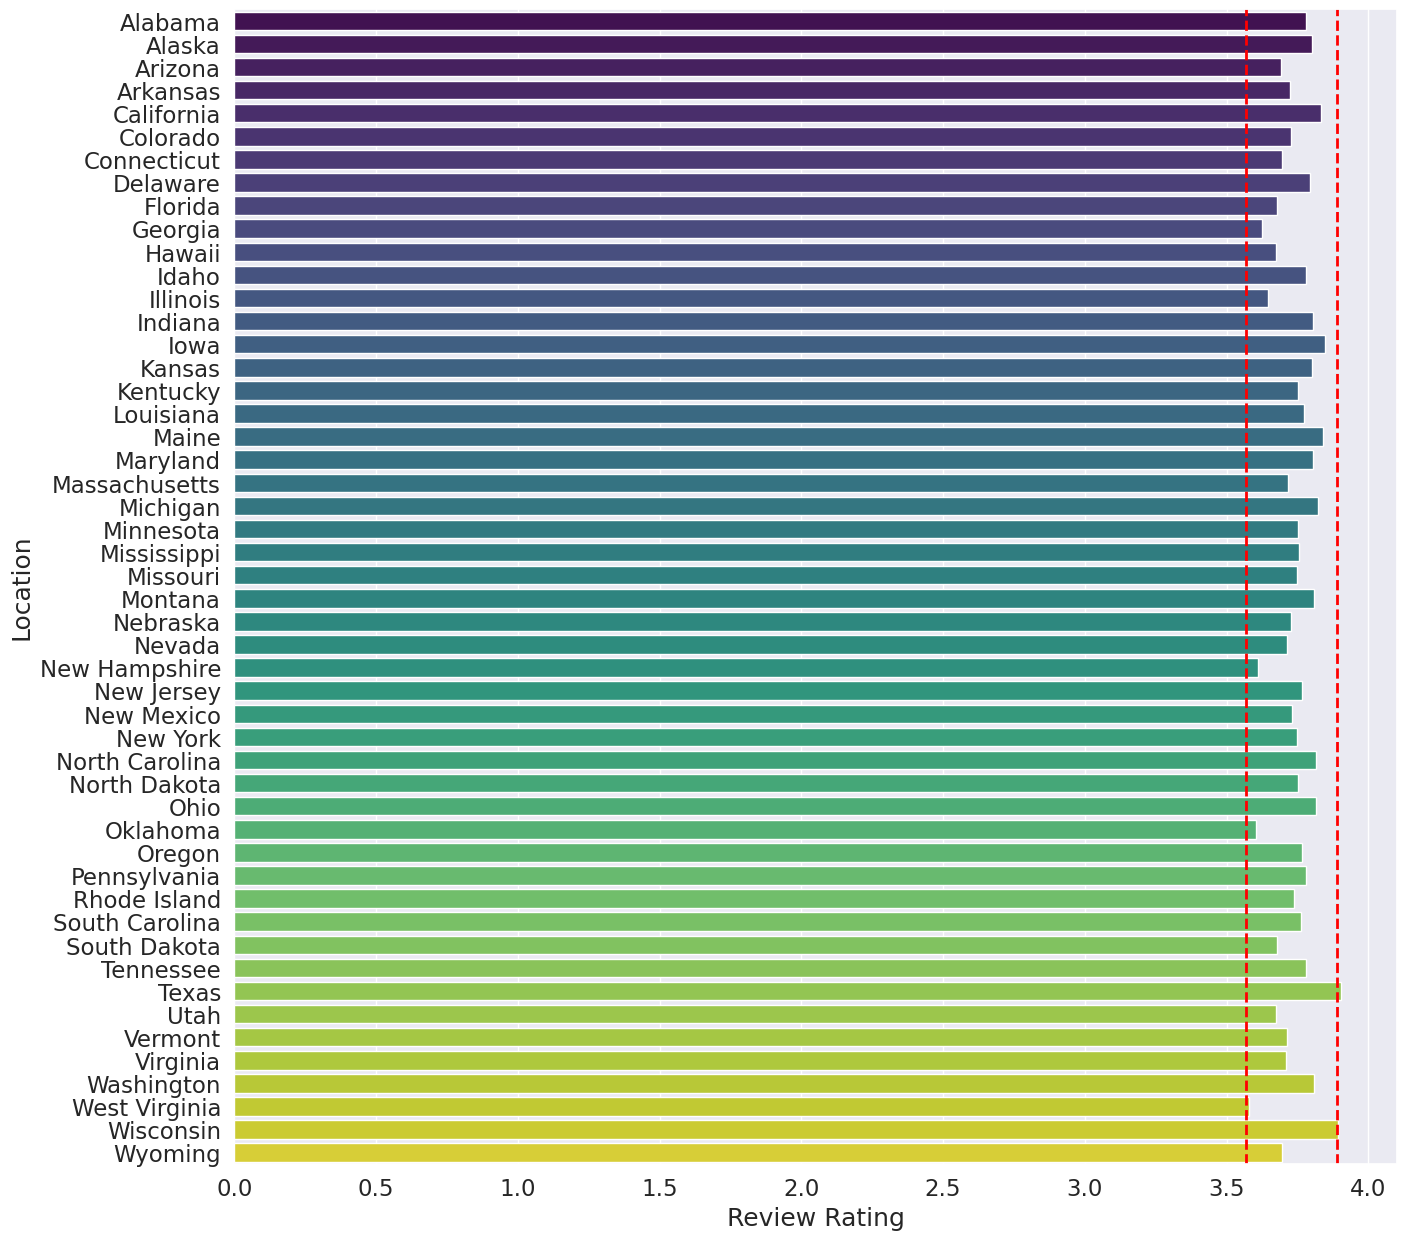

In [29]:
# average review ratings across state
grpdf2 = data.groupby('Location')['Review Rating'].mean().to_frame().reset_index()

# plotting the graph
plt.figure(figsize = (15,15))
sns.set(font_scale = 1.5)
sns.barplot(x= 'Review Rating', y = 'Location', data = grpdf2, palette = "viridis")
plt.axvline(x=3.57, color='red', linestyle='--', linewidth=2)
plt.axvline(x=3.89, color='red', linestyle='--', linewidth=2)
# lowest reviews come from West Virginia
# highest reviews come from Texas

##### (e) What item from each state has the highest/lowest reviews?

In [30]:
# which category from which state has the highest average rating?
grpdf3 = data.groupby(['Location', 'Item Purchased'])['Review Rating'].mean().reset_index()
print(grpdf3.loc[grpdf3['Review Rating'].idxmax()])
# which item in the lowest rated category has the lowest rating?
print(grpdf3.loc[grpdf3['Review Rating'].idxmin()])

Location          Louisiana
Item Purchased        Boots
Review Rating           5.0
Name: 407, dtype: object
Location          Tennessee
Item Purchased        Shirt
Review Rating           2.5
Name: 997, dtype: object


In [31]:
grpdf3

,Location,Item Purchased,Review Rating
0,Alabama,Backpack,4.700000
1,Alabama,Belt,4.550000
2,Alabama,Blouse,3.325000
3,Alabama,Boots,3.900000
4,Alabama,Coat,4.133333
...,...,...,...
1194,Wyoming,Sneakers,3.133333
1195,Wyoming,Socks,2.500000
1196,Wyoming,Sunglasses,3.720000
1197,Wyoming,Sweater,3.600000


<ipython-input-32-358947c8aedf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = grpdf3.pivot('Location', 'Item Purchased', 'Review Rating')


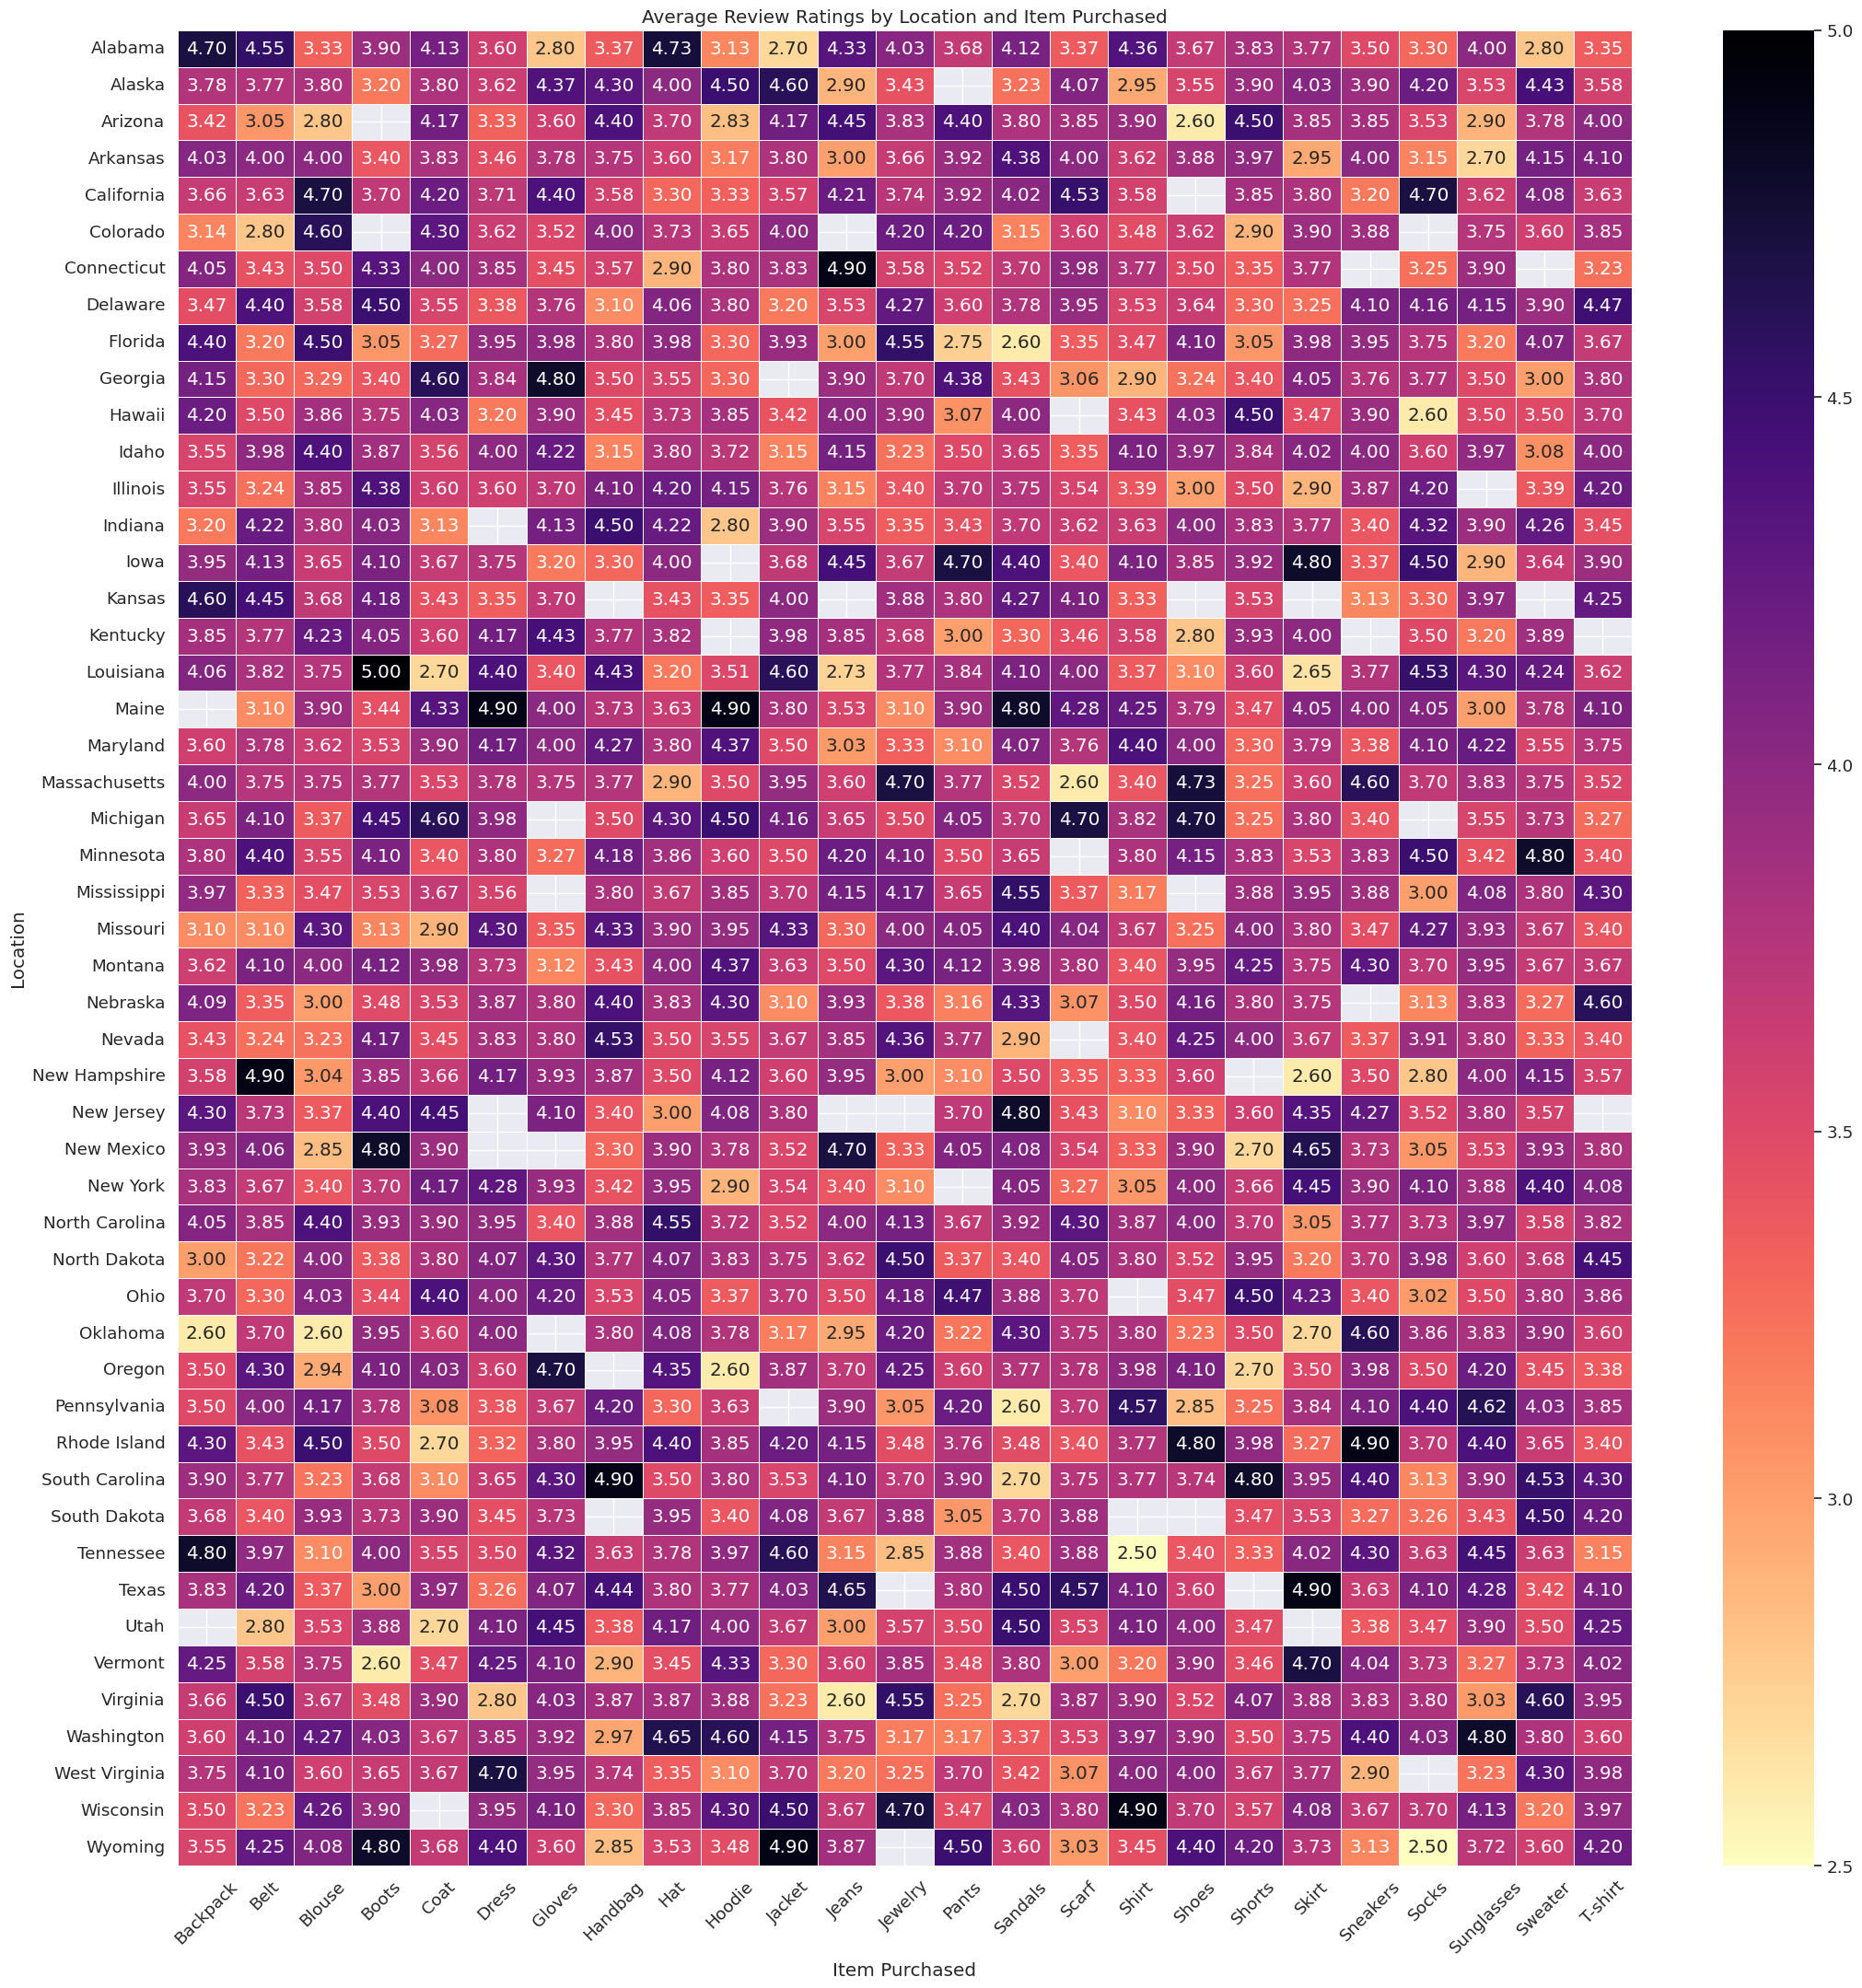

In [32]:
# graph of item purchased across location -- which item has the highest/lowest rating
heatmap_data = grpdf3.pivot('Location', 'Item Purchased', 'Review Rating')

# a heatmap
plt.figure(figsize=(22, 22))
sns.set(font_scale=1.2)
sns.heatmap(heatmap_data, cmap='magma_r', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Review Ratings by Location and Item Purchased')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Learning points:

(1) most of our items sold were given a 3.4 rating

(2) each category has roughly the same average rating of 3.7

(3) the 3 items with the lowest rating comes from the Clothing category. Gloves from the Accessories category has the highest average rating, and the next 2 highest rating item comes from the Footwear category

(4) Customers from Texas gives the highest average rating, with customers in West Virginia gives the lowest average rating



Room for improvement:

(1) How can we better utilize the 'Location' variable-- how to get more meaningful findings

(2) How to improve the last graph?

top 5 and bottom 5 states

In [33]:
# count the unique values in Category and Shipping Type
print(data['Category'].value_counts())

print(data['Shipping Type'].value_counts())


0    1737
1    1240
2     599
3     324
Name: Category, dtype: int64
0    675
1    654
2    650
3    648
4    646
5    627
Name: Shipping Type, dtype: int64


<ipython-input-34-fd5a312d0798>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


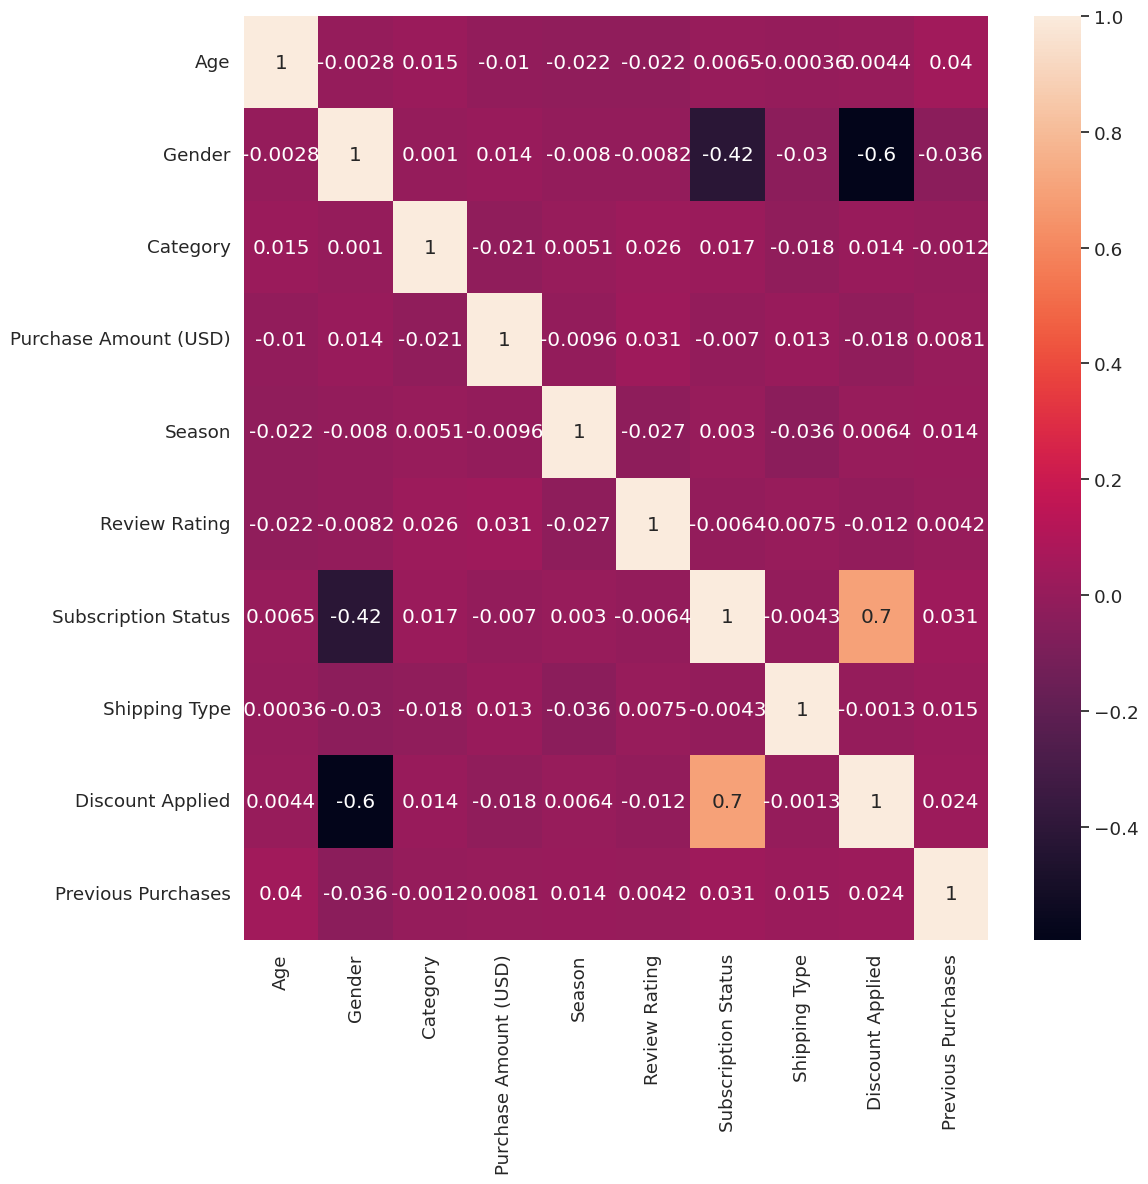

In [34]:
# create the graph of multi-collinearity
corr_matrix = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix,annot = True)
plt.show()
# more than 0.6 is a strong correlation